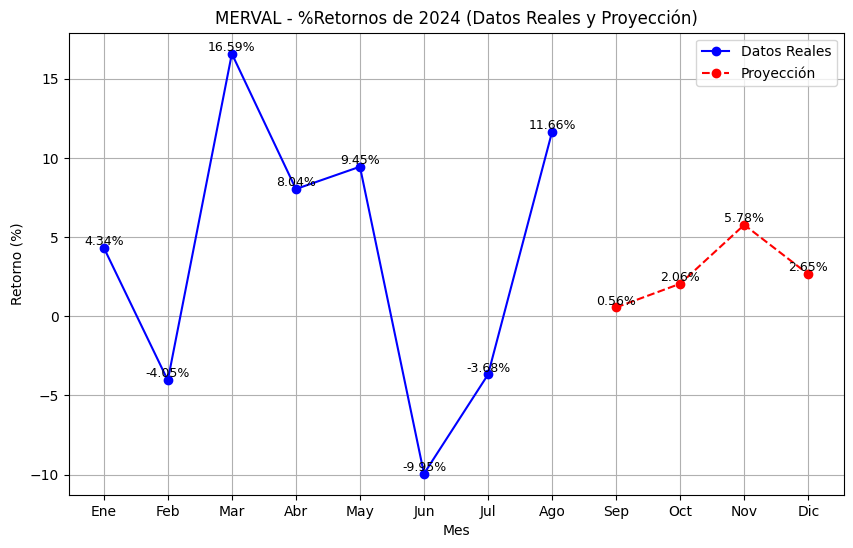

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame con los datos históricos
data = {
    'Año': range(2007, 2025),
    'Ene': [-1.99, -12.04, -0.41, -7.35, -1.14, 14.10, 7.96, -19.34, -5.99, -3.15, 15.14, 11.20, 24.24, -14.87, -17.23, -2.64, 17.64, 4.34],
    'Feb': [6.70, 6.15, -12.33, -2.00, -5.75, -6.58, -23.22, 15.12, 16.24, 1.86, 2.72, -8.00, -10.18, -11.40, 9.60, 7.35, -3.09, -4.05],
    'Mar': [3.31, -1.61, 11.20, 5.94, -0.30, -6.65, 15.33, 11.69, 12.05, 7.24, 6.21, -5.03, -12.65, -32.73, 0.48, 8.62, -9.16, 16.59],
    'Abr': [3.63, 0.29, 11.68, 3.57, -3.80, -18.34, 5.51, 7.37, 13.60, 8.00, 2.94, -6.19, -13.24, 1.72, -4.70, -10.83, 6.98, 8.04],
    'May': [-2.49, 4.27, 22.52, -10.40, -1.91, -15.87, -2.22, 4.53, -9.74, -4.85, 2.27, -20.99, 13.86, 17.08, 18.20, 3.42, 7.40, 9.45],
    'Jun': [-3.39, -3.38, -1.96, -2.05, 7.46, -0.21, -6.84, 9.03, -1.55, 7.27, -4.84, -20.68, 28.53, 8.80, -0.56, -21.50, 19.00, -9.95],
    'Jul': [-4.68, -3.71, 8.66, 13.67, -0.85, -4.82, 6.53, 6.11, -7.84, 6.60, -7.07, 18.87, -3.07, 9.25, -1.22, 20.71, -0.24, -3.68],
    'Ago': [4.35, -9.37, 3.51, -6.17, -15.43, 10.28, 9.43, -6.34, -4.29, -0.10, 10.40, -27.43, -59.77, -10.52, 18.99, 12.03, 0.37, 11.66],
    'Sep': [7.48, -9.96, 19.50, 14.38, -27.65, 4.14, 19.82, 8.23, -12.41, 5.23, 10.72, 2.64, 19.28, -21.07, -9.10, -4.47, -17.26, None],
    'Oct': [-2.00, -41.12, 3.11, 14.75, 17.83, -11.35, 4.17, 1.38, 31.40, 6.64, 5.57, 1.70, -4.28, 0.23, 0.82, 8.98, -2.88, None],
    'Nov': [-1.48, 1.25, -0.22, 6.68, 2.58, 4.74, 22.26, -1.91, -3.13, -5.72, -1.08, 3.56, 5.75, 25.52, -6.12, 5.55, 40.00, None],
    'Dic': [0.0, 5.15, 12.86, 7.10, -10.65, 16.28, -10.37, -11.41, -5.91, -4.94, 1.35, -6.72, 22.34, 0.87, 12.29, 14.46, 2.43, None]
}

df = pd.DataFrame(data)
df.set_index('Año', inplace=True)

# Datos reales hasta agosto de 2024
real_returns_2024 = df.loc[2024, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago']]

# Promedio histórico para proyectar septiembre a diciembre de 2024
projected_returns_2024 = {
    'Sep': df['Sep'].mean(),
    'Oct': df['Oct'].mean(),
    'Nov': df['Nov'].mean(),
    'Dic': df['Dic'].mean()
}

# Crear un DataFrame para los retornos de 2024 (reales y proyectados)
returns_2024 = pd.concat([real_returns_2024, pd.Series(projected_returns_2024)])

# Graficar los datos
plt.figure(figsize=(10, 6))

# Graficar los datos reales con línea continua
plt.plot(returns_2024.index[:8], returns_2024.values[:8], marker='o', linestyle='-', color='blue', label='Datos Reales')

# Graficar los datos proyectados con línea de puntos
plt.plot(returns_2024.index[8:], returns_2024.values[8:], marker='o', linestyle='--', color='red', label='Proyección')

# Agregar etiquetas a los puntos reales
for i, value in enumerate(returns_2024.values[:8]):
    plt.text(returns_2024.index[i], value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# Agregar etiquetas a los puntos proyectados
for i, value in enumerate(returns_2024.values[8:], start=8):
    plt.text(returns_2024.index[i], value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

# Etiquetas y leyenda
plt.title('MERVAL - %Retornos de 2024 (Datos Reales y Proyección)')
plt.xlabel('Mes')
plt.ylabel('Retorno (%)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
